In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt

**Define the function to approximate**

In [2]:
def target_function(x):
    return np.sin(2 * np.pi * x)

**Parameters**

In [3]:
EPOCHS        = 2000
TRAIN_POINTS  = 9
TEST_POINTS   = 256
LEARNING_RATE = 0.01

**Generate training and test data**

In [4]:
# Generate train data
x_train = np.linspace(0, 1, TRAIN_POINTS, dtype=np.float32)
y_train = target_function(x_train)
# Generate test data
x_test  = np.linspace(0, 1, TEST_POINTS, dtype=np.float32)
y_test  = target_function(x_test)

**Convert to PyTorch tensors**

In [5]:
# (unsqueeze) add an extra dimension for the features
x_train = torch.tensor(x_train).unsqueeze(1)  
y_train = torch.tensor(y_train).unsqueeze(1)  
x_test  = torch.tensor(x_test).unsqueeze(1) 
y_test  = torch.tensor(y_test).unsqueeze(1)  

**Check dimensions**

In [6]:
print(x_train.shape)

torch.Size([9, 1])


**Define the neural network model**

In [7]:
 class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Hidden layer with 10 neurons
        self.hidden = nn.Linear(1, 10)  
        # Output layer
        self.output = nn.Linear(10, 1)  

    def forward(self, x):
        # Apply Tanh activation function
        x = torch.tanh(self.hidden(x)) 
        x = self.output(x)
        return x

**Instantiate the model, define the loss function and the optimizer**

In [8]:
# Nn's model
model = SimpleNN()
# Loss (mean squared error)
criterion = nn.MSELoss()
# Training optimizer
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

**Training loop**

In [9]:
loss_list = []
for epoch in range(EPOCHS):
    # Set the model to training mode
    model.train()
    # Clear the gradients of all optimized tensors
    optimizer.zero_grad()
    # Forward pass: compute the model output for the training data
    outputs = model(x_train)
    # Compute the loss between the predicted and true values
    loss = criterion(outputs, y_train)
    # Backward pass: compute the gradients of the loss with respect to model parameters
    loss.backward()
    # Perform a single optimization step (parameter update)
    optimizer.step()
    # Store the loss' value
    loss_list.append(loss.item())
    #
    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{EPOCHS}], Loss: {loss.item():.4f}')

Epoch [200/2000], Loss: 0.2583
Epoch [400/2000], Loss: 0.0437
Epoch [600/2000], Loss: 0.0027
Epoch [800/2000], Loss: 0.0015
Epoch [1000/2000], Loss: 0.0009
Epoch [1200/2000], Loss: 0.0006
Epoch [1400/2000], Loss: 0.0004
Epoch [1600/2000], Loss: 0.0003
Epoch [1800/2000], Loss: 0.0003
Epoch [2000/2000], Loss: 0.0002


**Plot the loss**

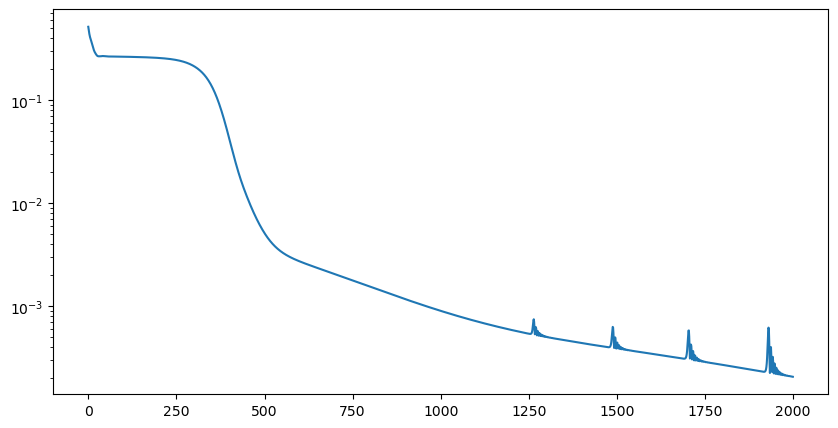

In [10]:
plt.figure(figsize=(10, 5))
plt.semilogy(loss_list)
plt.show()

In [11]:
# Evaluate the model
model.eval()
with torch.no_grad():
    predicted = model(x_test).numpy()

**Plot the results**

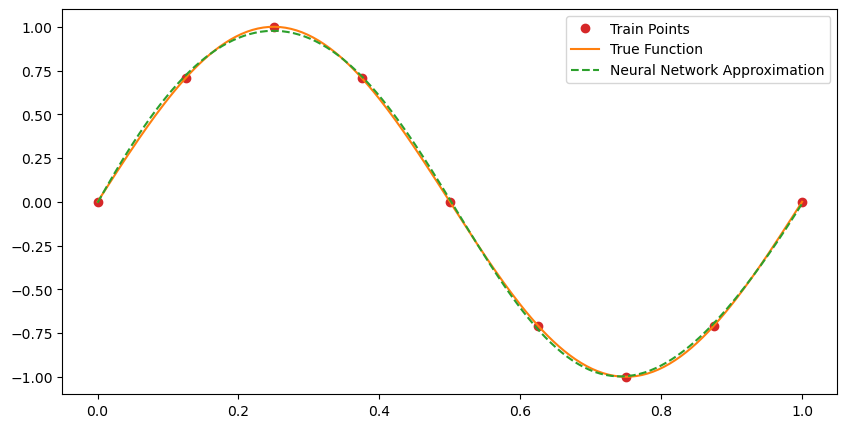

In [12]:
# 
plt.figure(figsize=(10, 5))
#
plt.plot(x_train.numpy(), y_train.numpy(), 
         label='Train Points',
         color='tab:red',
         marker='o',
         linestyle='',
        )
#
plt.plot(x_test.numpy(), y_test.numpy(), 
         label='True Function',
         color='tab:orange',
        )
#
plt.plot(x_test.numpy(), predicted, 
         label='Neural Network Approximation',
         color='tab:green',
         linestyle='--',
        )
#
plt.legend()
plt.show()